[  4.44000000e-01   1.73914000e+03]
[   0.70784932  365.40043405]


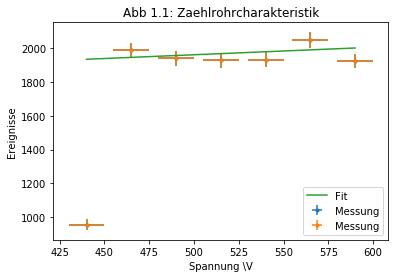

In [6]:
import numpy as np
import matplotlib.pyplot as plt

U=np.array([440,465,490,515,540,565,590])
dU=np.array([10,10,10,10,10,10,10]) #np.full()
Z=np.array([956,1989,1941,1928,1932,2049,1924])
dZ=np.sqrt(Z)

plt.errorbar(U,Z,xerr=dU,yerr=dZ,fmt='.',label='Messung')
plt.ylabel('Ereignisse')
plt.xlabel('Spannung \V')
plt.title('Abb 1.1: Zaehlrohrcharakteristik')

from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x+b

popt,pcov=curve_fit(linear,U[1:-1],Z[1:-1])

plt.plot(U,linear(U,*popt), label='Fit')
plt.legend(loc='best')
print(popt)
print(np.sqrt(np.diagonal(pcov)))
plt.show()
#plt.savefig('YC.jpg', format='jpg',dpi=1000)

In [ ]:
anzahl,hauf=np.loadtxt('data31.txt',unpack=True)
fehler=np.sqrt(hauf)

#plt.errorbar(anzahl, hauf, fehler, fmt='.')
#plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit \ 1/s')
#plt.ylabel('Haeufigkeit')
#plt.title('Statistik des radioaktiven Zerfalls')
def gaussian(x,A,mu,sig):
    return A/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/2/sig**2)
popt,pcov=curve_fit(gaussian,anzahl[21:-9],hauf[21:-9],p0=[2361,71,8.6],sigma=fehler[21:-9])
from scipy.special import gamma
def poisson(x,A_p,mu_p):
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)
popt_p,pcov_p=curve_fit(poisson, anzahl[21:-9],hauf[21:-9],p0=[2361,71],sigma=fehler[21:-9])
plt.errorbar(anzahl, hauf, fehler, fmt='.',label='Messung')
x=np.linspace(40,110,100)
plt.plot(x,gaussian(x,*popt),label='Gaussian')
plt.plot(x,poisson(x,*popt_p),label='Poisson',linestyle=':')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit \ 1/s')
plt.ylabel('Haeufigkeit')
plt.legend(loc='best')
plt.title('Statistik des radioaktiven Zerfalls')
#plt.show()
plt.savefig('YC2.pdf',format='pdf',dpi=1000)
print('Gaussfit:')
print("A=",popt[0],", Standardabweichung=",np.sqrt(pcov[0][0]))
print("mu=",popt[1],", Standardabweichung=",np.sqrt(pcov[1][1]))
print("sig=",popt[2],", Standardabweichung=",np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0],", Standardabweichung=",np.sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1],", Standardabweichung=",np.sqrt(pcov_p[1][1]))
#Gauss
chi2_g=np.sum((gaussian(anzahl[21:-9],*popt)-hauf[21:-9])**2/fehler[21:-9]**2)
dof_g=len(anzahl[21:-9])-3
chi2_red_g=chi2_g/dof_g
print("chi2_g=",chi2_g)
print("chi2_red_g=",chi2_red_g)
#Poisson
chi2_p=np.sum((poisson(anzahl[21:-9],*popt_p)-hauf[21:-9])**2/fehler[21:-9]**2)
dof_p=len(anzahl[21:-9])-2
chi2_red_p=chi2_p/dof_p
print("chi2_p=",chi2_p)
print("chi2_red_p=",chi2_red_p)
from scipy.stats import chi2
#Gauss
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
print("Wahrscheinlichkeit Gauss=",prob_g,"%")
#Poisson
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Poisson=",prob_p,"%")